# 實作-以PTT 電影版為例-文章列表

In [18]:
import requests
from bs4 import BeautifulSoup
hders= {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36"}
url="https://www.ptt.cc/bbs/movie/index.html"
res=requests.get(url,headers=hders)
soup=BeautifulSoup(res.text,"html.parser")
# print(soup.prettify()) 先註解掉(檢查用)

article_title_html=soup.select('div[class="title"]') #兩個雙引號會怪怪所以一個用單引號
# print(article_title_html) 先註解掉(檢查用)
# print(type(article_title_html))答案為<class 'bs4.element.ResultSet'>

for each_article in article_title_html:
    print(each_article.a.text) 
    print("https://www.ptt.cc"+each_article.a['href'])




[討論] 無間道的疑問
https://www.ptt.cc/bbs/movie/M.1635068980.A.A70.html
[討論] 《瀑布》結局意象（有雷）
https://www.ptt.cc/bbs/movie/M.1635069931.A.832.html
[問片] 主角是一個會看見未來？的女生
https://www.ptt.cc/bbs/movie/M.1635070419.A.BC8.html
[討論] 悟空跟火雲邪神被打一掌就乖了？
https://www.ptt.cc/bbs/movie/M.1635070745.A.ECD.html
[新聞] 修女「激情互相撫慰」聖母像變道具 女主角
https://www.ptt.cc/bbs/movie/M.1635070810.A.85D.html
[討論] the king 國王，想討論劇情（有雷
https://www.ptt.cc/bbs/movie/M.1635072172.A.F90.html
[普雷] 猛毒2... 
https://www.ptt.cc/bbs/movie/M.1635074901.A.72D.html
[好雷]《藏愛的畫像》，憂傷潛伏在你我的關係裡
https://www.ptt.cc/bbs/movie/M.1635075933.A.4E0.html
[討論] 「微雷」台灣靈異驚悚恐怖片演化史
https://www.ptt.cc/bbs/movie/M.1635077207.A.BD0.html
[分享] 月老正式預告 
https://www.ptt.cc/bbs/movie/M.1635078171.A.A3D.html
[雷] 007生死交戰，媽的有夠難看
https://www.ptt.cc/bbs/movie/M.1635079632.A.294.html
[新聞] 台韓人權紀錄片播出 陳雅琳盼喚更多省思
https://www.ptt.cc/bbs/movie/M.1635082967.A.04F.html
[新聞] 吳可熙登上好萊塢電影  電影預告「爆乳」
https://www.ptt.cc/bbs/movie/M.1635084320.A.50D.html
[新聞]《長津湖》進中國影史第3 續集下個月續拍
https://www.ptt.cc/bb

# 實作-以PTT 電影版為例-多頁爬取

In [25]:
#方法一 
import requests
from bs4 import BeautifulSoup
hders= {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36"}
url="https://www.ptt.cc/bbs/movie/index9495.html" #注意:修改網址 找出現在首頁的號碼9495(按上頁再下頁回來)

pagenum=9495
while pagenum>=9493:
    url="https://www.ptt.cc/bbs/movie/index%s.html"%(pagenum)
    res=requests.get(url,headers=hders)
    soup=BeautifulSoup(res.text,"html.parser") 
    article_title_html=soup.select('div[class="title"]') 


    for each_article in article_title_html:
        try: #因為文章被刪除時會出現error，抓不到a。可以看跑出來的結果中有範例
            print(each_article.a.text) 
            print("https://www.ptt.cc"+each_article.a['href'])
        except AttributeError as e: #AttributeError這辭是專有名詞
            print(each_article)
            print(e.args) # 取得詳細內容 args是固定的
    pagenum-=1
     



[討論] 無間道的疑問
https://www.ptt.cc/bbs/movie/M.1635068980.A.A70.html
[討論] 《瀑布》結局意象（有雷）
https://www.ptt.cc/bbs/movie/M.1635069931.A.832.html
[問片] 主角是一個會看見未來？的女生
https://www.ptt.cc/bbs/movie/M.1635070419.A.BC8.html
[討論] 悟空跟火雲邪神被打一掌就乖了？
https://www.ptt.cc/bbs/movie/M.1635070745.A.ECD.html
[新聞] 修女「激情互相撫慰」聖母像變道具 女主角
https://www.ptt.cc/bbs/movie/M.1635070810.A.85D.html
[討論] the king 國王，想討論劇情（有雷
https://www.ptt.cc/bbs/movie/M.1635072172.A.F90.html
[普雷] 猛毒2... 
https://www.ptt.cc/bbs/movie/M.1635074901.A.72D.html
[好雷]《藏愛的畫像》，憂傷潛伏在你我的關係裡
https://www.ptt.cc/bbs/movie/M.1635075933.A.4E0.html
[討論] 「微雷」台灣靈異驚悚恐怖片演化史
https://www.ptt.cc/bbs/movie/M.1635077207.A.BD0.html
[分享] 月老正式預告 
https://www.ptt.cc/bbs/movie/M.1635078171.A.A3D.html
[雷] 007生死交戰，媽的有夠難看
https://www.ptt.cc/bbs/movie/M.1635079632.A.294.html
[新聞] 台韓人權紀錄片播出 陳雅琳盼喚更多省思
https://www.ptt.cc/bbs/movie/M.1635082967.A.04F.html
[新聞] 吳可熙登上好萊塢電影  電影預告「爆乳」
https://www.ptt.cc/bbs/movie/M.1635084320.A.50D.html
[新聞]《長津湖》進中國影史第3 續集下個月續拍
https://www.ptt.cc/bb

In [38]:
#方法二 
import requests
from bs4 import BeautifulSoup
hders= {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36"}
url="https://www.ptt.cc/bbs/movie/index.html"

for i in range(0,3):#假設我們抓3頁
    res=requests.get(url,headers=hders)
    soup=BeautifulSoup(res.text,"html.parser")

    article_title_html=soup.select('div[class="title"]') 

    for each_article in article_title_html:
        try: #因為文章被刪除時會出現error，抓不到a。可以看跑出來的結果中有範例
            print(each_article.a.text) 
            print("https://www.ptt.cc"+each_article.a['href'])
        except AttributeError as e: #AttributeError這辭是固定個
            print(each_article)
            print(e.args) # 取得詳細內容 args是固定的    

    last_page_url=soup.select('a[class="btn wide"]')[1]['href'] #element那看看上頁那個按鈕
    last_page_url="https://www.ptt.cc"+last_page_url
    url=last_page_url


[討論] 無間道的疑問
https://www.ptt.cc/bbs/movie/M.1635068980.A.A70.html
[討論] 《瀑布》結局意象（有雷）
https://www.ptt.cc/bbs/movie/M.1635069931.A.832.html
[問片] 主角是一個會看見未來？的女生
https://www.ptt.cc/bbs/movie/M.1635070419.A.BC8.html
[討論] 悟空跟火雲邪神被打一掌就乖了？
https://www.ptt.cc/bbs/movie/M.1635070745.A.ECD.html
[新聞] 修女「激情互相撫慰」聖母像變道具 女主角
https://www.ptt.cc/bbs/movie/M.1635070810.A.85D.html
[討論] the king 國王，想討論劇情（有雷
https://www.ptt.cc/bbs/movie/M.1635072172.A.F90.html
[普雷] 猛毒2... 
https://www.ptt.cc/bbs/movie/M.1635074901.A.72D.html
[好雷]《藏愛的畫像》，憂傷潛伏在你我的關係裡
https://www.ptt.cc/bbs/movie/M.1635075933.A.4E0.html
[討論] 「微雷」台灣靈異驚悚恐怖片演化史
https://www.ptt.cc/bbs/movie/M.1635077207.A.BD0.html
[分享] 月老正式預告 
https://www.ptt.cc/bbs/movie/M.1635078171.A.A3D.html
[雷] 007生死交戰，媽的有夠難看
https://www.ptt.cc/bbs/movie/M.1635079632.A.294.html
[新聞] 台韓人權紀錄片播出 陳雅琳盼喚更多省思
https://www.ptt.cc/bbs/movie/M.1635082967.A.04F.html
[新聞] 吳可熙登上好萊塢電影  電影預告「爆乳」
https://www.ptt.cc/bbs/movie/M.1635084320.A.50D.html
[新聞]《長津湖》進中國影史第3 續集下個月續拍
https://www.ptt.cc/bb

soup.select('a[class="btn wide"]')  a是標籤、[class="btn wide"]是屬性
select回傳所有符合這標籤及屬性的東西，如下圖 共有3個(最舊.上頁.最新) 要取的是上頁 所以是[1] 並取出其href這屬性

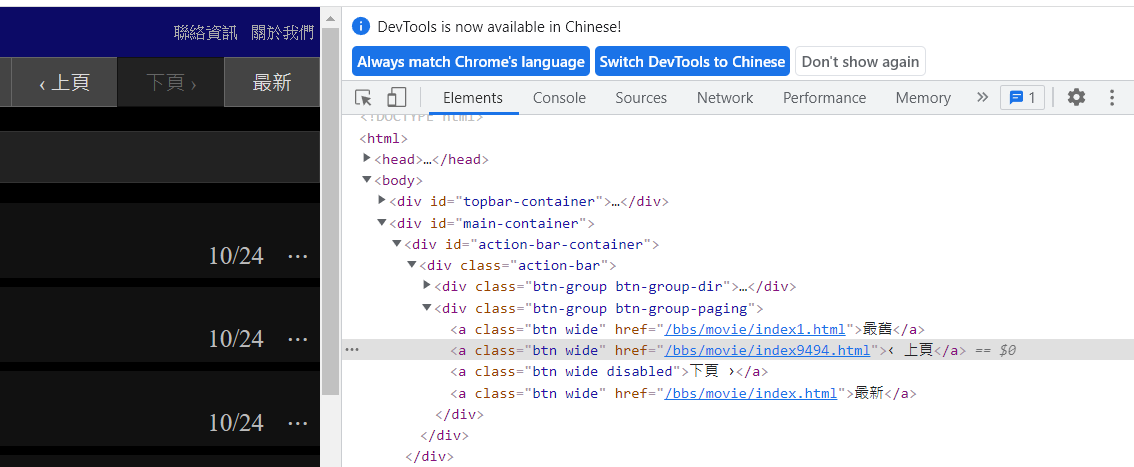

# 實作-以PTT 電影版為例–儲存內文

In [44]:
import requests
from bs4 import BeautifulSoup
import os
hders= {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36"}
url="https://www.ptt.cc/bbs/movie/index.html"

# 創建資料夾存放文字檔
resource_path = r'./res_movie'
if not os.path.exists(resource_path):
    os.mkdir(resource_path) #如果不存在就創建

for i in range(0,3):
    res = requests.get(url, headers = hders)
    soup = BeautifulSoup(res.text, 'html.parser')
    article_title_html = soup.select('div[class="title"]')

    for each_article in article_title_html:
        try:
            print(each_article.a.text)
            print('https://www.ptt.cc' + each_article.a['href'])

            # 文章網址
            article_url = 'https://www.ptt.cc' + each_article.a['href']
            article_text = each_article.a.text
            # 對文章網址提出請求
            article_res = requests.get(article_url, headers = headers)
            article_soup = BeautifulSoup(article_res.text, 'html.parser')
            # 宣告一個文章內容字串的變數
            article_content = article_soup.select('div#main-content')[0].text.split('--')[0]
            with open(r'%s/%s.txt'%(resource_path, article_text), 'w', encoding = 'utf-8') as w:
                w.write(article_content)
            print()
        except AttributeError as e: #except後面加的都是error的專有名詞
            print('==========')
            print(each_article)
            print(e.args)
            print('==========')
        except FileNotFoundError as e: #FileNotFoundError檔名可能有斜線。害他判讀成資料夾路徑
            pass
        except OSError as e: #OSError有非法字元
            pass

    page_number -= 1

[討論] 無間道的疑問
https://www.ptt.cc/bbs/movie/M.1635068980.A.A70.html

[討論] 《瀑布》結局意象（有雷）
https://www.ptt.cc/bbs/movie/M.1635069931.A.832.html

[問片] 主角是一個會看見未來？的女生
https://www.ptt.cc/bbs/movie/M.1635070419.A.BC8.html

[討論] 悟空跟火雲邪神被打一掌就乖了？
https://www.ptt.cc/bbs/movie/M.1635070745.A.ECD.html

[新聞] 修女「激情互相撫慰」聖母像變道具 女主角
https://www.ptt.cc/bbs/movie/M.1635070810.A.85D.html

[討論] the king 國王，想討論劇情（有雷
https://www.ptt.cc/bbs/movie/M.1635072172.A.F90.html

[普雷] 猛毒2... 
https://www.ptt.cc/bbs/movie/M.1635074901.A.72D.html

[好雷]《藏愛的畫像》，憂傷潛伏在你我的關係裡
https://www.ptt.cc/bbs/movie/M.1635075933.A.4E0.html

[討論] 「微雷」台灣靈異驚悚恐怖片演化史
https://www.ptt.cc/bbs/movie/M.1635077207.A.BD0.html

[分享] 月老正式預告 
https://www.ptt.cc/bbs/movie/M.1635078171.A.A3D.html

[雷] 007生死交戰，媽的有夠難看
https://www.ptt.cc/bbs/movie/M.1635079632.A.294.html

[新聞] 台韓人權紀錄片播出 陳雅琳盼喚更多省思
https://www.ptt.cc/bbs/movie/M.1635082967.A.04F.html

[新聞] 吳可熙登上好萊塢電影  電影預告「爆乳」
https://www.ptt.cc/bbs/movie/M.1635084320.A.50D.html

[新聞]《長津湖》進中國影史第3 續集下個月續拍
https://